In [1]:
import numpy as np
import cv2
import datetime
import keras
import tensorflow as tf
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.layers import Conv2D, Flatten, MaxPooling2D,Dense, MaxPool2D 
from keras.layers import BatchNormalization
from keras.models  import Sequential
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
import random,os,glob
import matplotlib.pyplot as plt

from keras.applications.vgg16 import VGG16,preprocess_input

In [2]:
%load_ext tensorboard

In [3]:
dir_path = r"D:\AI_ML_DL\Datasets\freiburg_groceries_dataset\images"

In [4]:
img_size=256

In [5]:
img_list = glob.glob(os.path.join(dir_path, '*/*.png'))

In [6]:
img_list

['D:\\AI_ML_DL\\Datasets\\freiburg_groceries_dataset\\images\\BEANS\\BEANS0000.png',
 'D:\\AI_ML_DL\\Datasets\\freiburg_groceries_dataset\\images\\BEANS\\BEANS0001.png',
 'D:\\AI_ML_DL\\Datasets\\freiburg_groceries_dataset\\images\\BEANS\\BEANS0002.png',
 'D:\\AI_ML_DL\\Datasets\\freiburg_groceries_dataset\\images\\BEANS\\BEANS0003.png',
 'D:\\AI_ML_DL\\Datasets\\freiburg_groceries_dataset\\images\\BEANS\\BEANS0004.png',
 'D:\\AI_ML_DL\\Datasets\\freiburg_groceries_dataset\\images\\BEANS\\BEANS0005.png',
 'D:\\AI_ML_DL\\Datasets\\freiburg_groceries_dataset\\images\\BEANS\\BEANS0006.png',
 'D:\\AI_ML_DL\\Datasets\\freiburg_groceries_dataset\\images\\BEANS\\BEANS0007.png',
 'D:\\AI_ML_DL\\Datasets\\freiburg_groceries_dataset\\images\\BEANS\\BEANS0008.png',
 'D:\\AI_ML_DL\\Datasets\\freiburg_groceries_dataset\\images\\BEANS\\BEANS0009.png',
 'D:\\AI_ML_DL\\Datasets\\freiburg_groceries_dataset\\images\\BEANS\\BEANS0010.png',
 'D:\\AI_ML_DL\\Datasets\\freiburg_groceries_dataset\\images\\BEA

In [7]:
train=ImageDataGenerator(horizontal_flip=True,
                         vertical_flip=True,
                         validation_split=0.1,
                         rescale=1./255,
                         shear_range = 0.2,
                         zoom_range = 0.2,
                         width_shift_range = 0.2,
                         height_shift_range = 0.2,)

test=ImageDataGenerator(rescale=1/255,
                        validation_split=0.1)

train_generator=train.flow_from_directory(dir_path,
                                          target_size=(img_size,img_size),
                                          batch_size=32,
                                          class_mode='categorical',
                                          subset='training')

test_generator=test.flow_from_directory(dir_path,
                                        target_size=(img_size,img_size),
                                        batch_size=32,
                                        class_mode='categorical',
                                        subset='validation')

labels = (train_generator.class_indices)
print(labels)

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 4463 images belonging to 25 classes.
Found 484 images belonging to 25 classes.
{'BEANS': 0, 'CAKE': 1, 'CANDY': 2, 'CEREAL': 3, 'CHIPS': 4, 'CHOCOLATE': 5, 'COFFEE': 6, 'CORN': 7, 'FISH': 8, 'FLOUR': 9, 'HONEY': 10, 'JAM': 11, 'JUICE': 12, 'MILK': 13, 'NUTS': 14, 'OIL': 15, 'PASTA': 16, 'RICE': 17, 'SODA': 18, 'SPICES': 19, 'SUGAR': 20, 'TEA': 21, 'TOMATO_SAUCE': 22, 'VINEGAR': 23, 'WATER': 24}
{0: 'BEANS', 1: 'CAKE', 2: 'CANDY', 3: 'CEREAL', 4: 'CHIPS', 5: 'CHOCOLATE', 6: 'COFFEE', 7: 'CORN', 8: 'FISH', 9: 'FLOUR', 10: 'HONEY', 11: 'JAM', 12: 'JUICE', 13: 'MILK', 14: 'NUTS', 15: 'OIL', 16: 'PASTA', 17: 'RICE', 18: 'SODA', 19: 'SPICES', 20: 'SUGAR', 21: 'TEA', 22: 'TOMATO_SAUCE', 23: 'VINEGAR', 24: 'WATER'}


In [8]:
for image_batch, label_batch in train_generator:
      break
image_batch.shape, label_batch.shape

((32, 256, 256, 3), (32, 25))

###  VGG16 architecture

In [8]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=25, activation="softmax"))

### Toned down vgg16

In [46]:
model=Sequential()
#Convolution blocks
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(img_size,img_size,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())


model.add(Dense(25,activation='softmax'))

filepath="retail_trained_model.h5"
checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint1]

### Transfer Learning

In [12]:
base_model = VGG16(include_top=False,
                  input_shape = (img_size,img_size,3),
                  weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    
for layer in base_model.layers:
    print(layer,layer.trainable)

model = keras.models.Sequential()
model.add(base_model)
model.add( tf.keras.layers.GlobalAveragePooling2D())
model.add( tf.keras.layers.Dropout(0.3))
model.add( tf.keras.layers.Dense(25,activation='softmax'))

# model.summary()

58892288/58889256 [==============================] - 43s 1us/step
<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x000001C835B98FD0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001C837BC46A0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001C837BC4BE0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001C837BC4CC0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001C837C19A58> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001C837D8B9B0> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000001C837D8B8D0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001C837D92518> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001C837D9D400> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000001C837D9D828> False
<tensorflow.python.keras.layers.pooling.Ma

In [13]:
input_shape=[None,img_size,img_size,3]
model.build(input_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 25)                12825     
Total params: 14,727,513
Trainable params: 12,825
Non-trainable params: 14,714,688
_________________________________________________________________


In [10]:
filepath="vgg_retail_trained_model.h5"
checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint1]

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       2

### retail-report architecture

In [18]:
model=Sequential()
#Convolution blocks
model.add(Conv2D(3,(11,11),activation='relu',input_shape=(img_size,img_size,3)))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())

model.add(Conv2D(16,(5,5),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())

model.add(Conv2D(96,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(2048,activation='relu'))
model.add(Dense(2048,activation='relu'))


model.add(Dense(25,activation='softmax'))

# !del r"D:\Internship\DL\logs\*"
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


filepath="custom1_retail_trained_model.h5"
checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint1,tensorboard_callback]

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 246, 246, 3)       1092      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 123, 123, 3)       0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 123, 123, 3)       12        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 119, 119, 16)      1216      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 59, 59, 16)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 59, 59, 16)        64        
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 57, 57, 96)       

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc']) # RMS PROP - No accuracy

In [23]:
history = model.fit_generator(train_generator,
                              epochs=1,
                              steps_per_epoch=4463//32,
                              validation_data=test_generator,
                              validation_steps=484//32,
                              workers = 4,
                              callbacks=callbacks_list) 

InternalError: GPU sync failed

In [22]:
from numba import cuda

cuda.select_device(0)
cuda.close()

In [16]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 7784), started 0:24:47 ago. (Use '!kill 7784' to kill it.)

In [15]:
%reload_ext tensorboard

In [17]:
model=keras.models.load_model('retail_saved.h5')

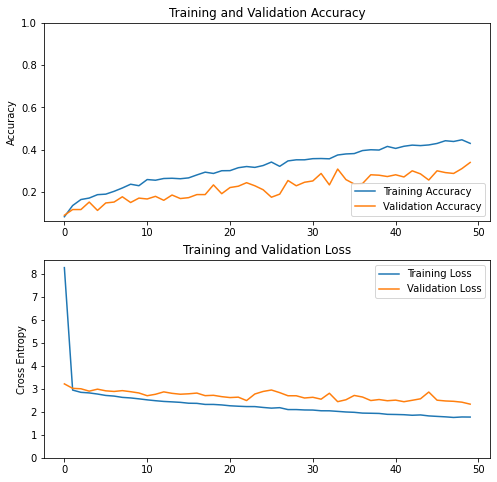

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

# ________________ Graph 1 -------------------------

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

# ________________ Graph 2 -------------------------

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

Maximum Probability:  0.27124715
Classified: TOMATO_SAUCE


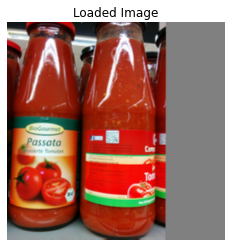

In [24]:
from keras.preprocessing import image

img_path =r"D:\Internship\DL\augmented_images-20210619T134524Z-002\augmented_images\TOMATO_SAUCE\aug_0_3177.png"

img = image.load_img(img_path, target_size=(256, 256))
img = image.img_to_array(img, dtype=np.uint8)
img=np.array(img)/255.0

plt.title("Loaded Image")
plt.axis('off')
plt.imshow(img.squeeze())

p=model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Maximum Probability: ",np.max(p[0], axis=-1))
predicted_class = labels[np.argmax(p[0], axis=-1)]
print("Classified:",predicted_class)